# Tarea 3. Midiendo rendimiento y riesgo.

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2018 hasta el 31 de diciembre del 2023.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
#stocks = ["BOIL", "BABA", "JD", "PLUG", "RIVN", "KR", "DKNG", "IWM"]
stocks = ["BOIL", "BABA", "JD", "PLUG", "KR", "DKNG", "IWM"] #sin rivian RIVN
#stocks =['BTC-USD','ETH-USD','MATIC-USD', 'ETH-USD']
data = yf.download(stocks, start='2015-01-01', end='2023-12-31')['Adj Close']

# Convertir el resultado en un DataFrame
df = pd.DataFrame(data)

# Imprimir las primeras filas del DataFrame
print(df.head())


[*********************100%%**********************]  7 of 7 completed

Ticker            BABA     BOIL  DKNG         IWM         JD         KR  PLUG
Date                                                                         
2015-01-02  102.225807  64080.0   NaN  105.352707  23.081705  26.823704  2.98
2015-01-05   99.660301  62880.0   NaN  103.944221  23.619829  26.633707  3.01
2015-01-06  101.949524  63000.0   NaN  102.145966  23.571783  26.633707  3.05
2015-01-07  100.775307  60720.0   NaN  103.403839  23.840843  27.440144  3.05
2015-01-08  103.636841  63600.0   NaN  105.157822  24.100298  27.951038  3.08


[*********************100%%**********************]  7 of 7 completed


<Axes: xlabel='Date'>

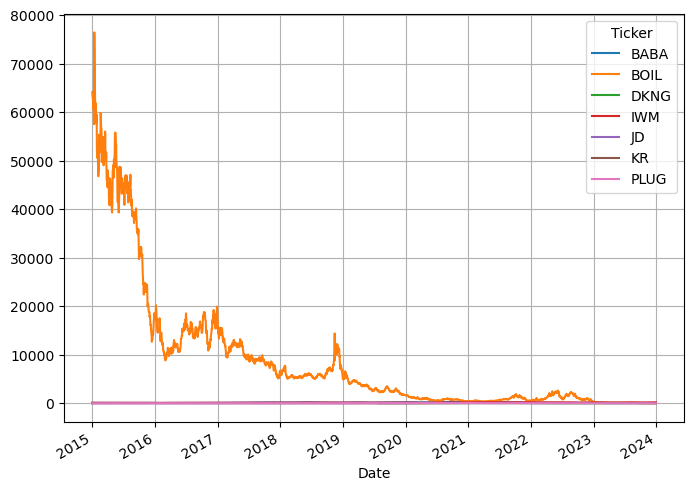

In [3]:
# Funcion para obtener directamente el Adj Close
def get_adj_close(tickets, start=None, end=None):
    return yf.download(tickets,  start='2015-01-01', end='2023-12-31')['Adj Close']
closes = get_adj_close(stocks,
                        start='2015-01-01')
# Gráfico
closes.plot(figsize=(8, 6),
            grid=True)

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [4]:
df

Ticker,BABA,BOIL,DKNG,IWM,JD,KR,PLUG
Date,,,,,,,
2015-01-02,102.225807,64080.000000,NaN,105.352707,23.081705,26.823704,2.98
2015-01-05,99.660301,62880.000000,NaN,103.944221,23.619829,26.633707,3.01
2015-01-06,101.949524,63000.000000,NaN,102.145966,23.571783,26.633707,3.05
2015-01-07,100.775307,60720.000000,NaN,103.403839,23.840843,27.440144,3.05
2015-01-08,103.636841,63600.000000,NaN,105.157822,24.100298,27.951038,3.08
...,...,...,...,...,...,...,...
2023-12-22,75.279999,28.580000,35.720001,201.479996,27.590000,45.139999,4.52
2023-12-26,75.849998,27.270000,35.549999,204.100006,27.610001,45.220001,4.78
2023-12-27,76.110001,27.780001,35.790001,204.820007,27.750000,45.209999,4.71


In [5]:
# Otra forma (más fácil)
ret = closes.pct_change().dropna()
ret.head()

Ticker,BABA,BOIL,DKNG,IWM,JD,KR,PLUG
Date,,,,,,,
2019-07-26,0.008179,-0.055300,0.0,0.011844,-0.008797,0.016083,-0.008811
2019-07-29,-0.009623,-0.038211,0.0,-0.006679,-0.005071,-0.002328,0.000000
2019-07-30,-0.016495,0.014370,0.0,0.010823,-0.030902,0.000000,-0.004444
2019-07-31,-0.005686,0.100000,0.0,-0.008109,-0.016765,-0.012599,-0.013393
2019-08-01,-0.043094,-0.064394,0.0,-0.014499,-0.043464,0.017013,-0.027149


<Axes: xlabel='Date'>

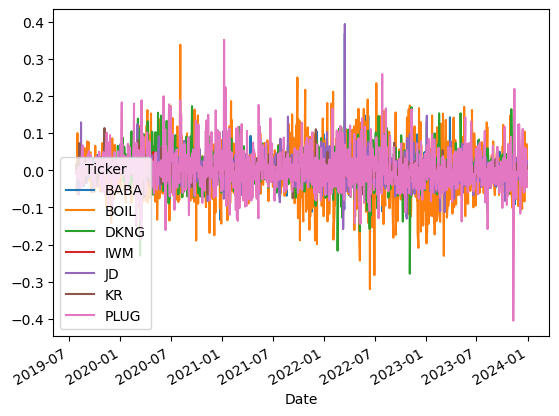

In [6]:
ret.plot()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [7]:
# Rendimiento medio diario (media aritmética)
ret.mean()

Ticker
BABA   -0.000239
BOIL   -0.001508
DKNG    0.002119
IWM     0.000437
JD      0.000530
KR      0.000952
PLUG    0.002170
dtype: float64

In [8]:
ret.std()

Ticker
BABA    0.031748
BOIL    0.070798
DKNG    0.043951
IWM     0.017497
JD      0.034514
KR      0.018708
PLUG    0.055927
dtype: float64

In [9]:
# Podemos resumir en un DataFrame
ret_summary = pd.DataFrame({'Media': ret.mean(), 'Vol': ret.std()})
ret_summary

,Media,Vol
Ticker,,
BABA,-0.000239,0.031748
BOIL,-0.001508,0.070798
DKNG,0.002119,0.043951
IWM,0.000437,0.017497
JD,0.000530,0.034514
KR,0.000952,0.018708
PLUG,0.002170,0.055927


In [10]:
import numpy as np

In [11]:
# Resumen en base anual
annual_ret_summary = pd.DataFrame({'Media': 252 * ret.mean(), 'Vol': np.sqrt(252) * ret.std()})
annual_ret_summary

,Media,Vol
Ticker,,
BABA,-0.060193,0.503986
BOIL,-0.380019,1.123880
DKNG,0.533973,0.697706
IWM,0.110235,0.277750
JD,0.133516,0.547889
KR,0.240029,0.296977
PLUG,0.546768,0.887820


In [12]:
import matplotlib.pyplot as plt


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

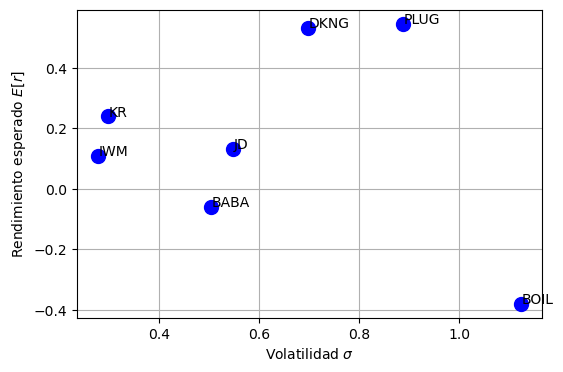

In [13]:
# Gráfico rendimiento esperado vs. volatilidad
plt.figure(figsize=(6, 4));
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i, 1], annual_ret_summary.iloc[i, 0], 'ob', ms=10)
    plt.text(annual_ret_summary.iloc[i, 1]+0.001, annual_ret_summary.iloc[i, 0], annual_ret_summary.index[i])
    
plt.grid()
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

In [14]:
# Importar el módulo optimize de la librería scipy
from scipy.optimize import minimize

In [15]:
# Funcion objetivo y condicion inicial
def min_sq(beta, y, x):
    f_hat = beta[0] + beta[1] * x
    sum_sq = ((y - f_hat)**2).sum()
    return sum_sq

x0 = [0, 0]

In [16]:
# Resolver problema de optimizacion
resultado = minimize(fun=min_sq,
                     x0=x0,
                     args=(annual_ret_summary['Media'], annual_ret_summary['Vol'])
                    )
resultado

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.6136002933323501
        x: [ 2.915e-01 -2.113e-01]
      nit: 3
      jac: [-7.451e-09  7.451e-09]
 hess_inv: [[ 4.069e-01 -5.417e-01]
            [-5.417e-01  8.744e-01]]
     nfev: 15
     njev: 5

In [17]:
beta = resultado.x

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

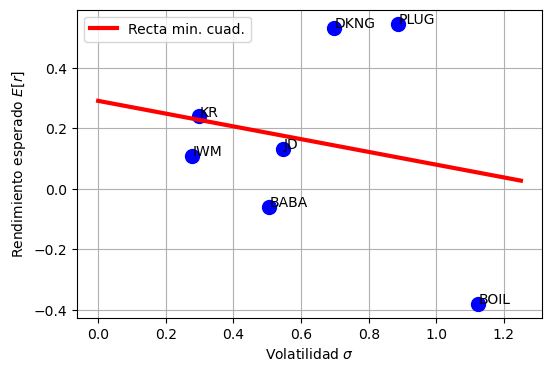

In [23]:
# Ventana para graficar
plt.figure(figsize=(6, 4));
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i, 1], annual_ret_summary.iloc[i, 0], 'ob', ms=10)
    plt.text(annual_ret_summary.iloc[i, 1]+0.002, annual_ret_summary.iloc[i, 0], annual_ret_summary.index[i])

x = np.linspace(0, 1.25)
plt.plot(x, beta[0] + beta[1] * x, '-r', lw=3, label='Recta min. cuad.')
    
plt.grid()
plt.legend(loc='best')
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

In [19]:
#Funcion objetivo
beta

array([ 0.2915025 , -0.21130228])

In [20]:
beta[0] + beta[1] * x

array([ 0.2915025 ,  0.28287792,  0.27425333,  0.26562875,  0.25700417,
        0.24837958,  0.239755  ,  0.23113042,  0.22250584,  0.21388125,
        0.20525667,  0.19663209,  0.1880075 ,  0.17938292,  0.17075834,
        0.16213376,  0.15350917,  0.14488459,  0.13626001,  0.12763542,
        0.11901084,  0.11038626,  0.10176168,  0.09313709,  0.08451251,
        0.07588793,  0.06726334,  0.05863876,  0.05001418,  0.04138959,
        0.03276501,  0.02414043,  0.01551585,  0.00689126, -0.00173332,
       -0.0103579 , -0.01898249, -0.02760707, -0.03623165, -0.04485623,
       -0.05348082, -0.0621054 , -0.07072998, -0.07935457, -0.08797915,
       -0.09660373, -0.10522831, -0.1138529 , -0.12247748, -0.13110206])

In [21]:
beta[0]

0.2915024991921418

In [22]:
beta[1]

-0.21130228114816868

Se puede ser que los activos que tienen una volatibilidad entre 0.25 y 0.30 tiene los mayores rendimiento. Teniendo en cuenta que 6 de 8 activos tienen un beneficio mayor a 12% que es mayor al ^GSPC

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Carlos Kelly.
</footer>